## Midterm 2 - MNIST Classification
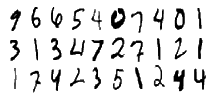
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/r52T6newOqn1Wcw03
#### Commit your code to github/bitbucket into folder midterm


In [17]:
from mnist import MNIST
import random
mndata = MNIST('data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(trimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

The amount of train images 60000
The amount of test images 60000
The label of random image 9 The random image is 
............................
............................
............................
............................
............................
............................
............................
...............@@@..........
..........@@@@@@@@@@........
.........@@@@.....@@........
........@@.......@@.........
.......@@.......@@..........
......@@........@@..........
......@@......@@@@..........
......@@....@@@@@@..........
.......@@@@@@@..@@..........
.........@@.....@@..........
................@@..........
................@@..........
................@@..........
................@@..........
................@@..........
................@@..........
................@@..........
................@@..........
................@@..........
.................@..........
............................
Images are binary with 28*28 =  784


In [31]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


seed = 7
numpy.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 10s - loss: 0.2787 - acc: 0.9211 - val_loss: 0.1412 - val_acc: 0.9575
Epoch 2/50
 - 9s - loss: 0.1117 - acc: 0.9676 - val_loss: 0.0919 - val_acc: 0.9710
Epoch 3/50
 - 9s - loss: 0.0718 - acc: 0.9799 - val_loss: 0.0779 - val_acc: 0.9772
Epoch 4/50
 - 8s - loss: 0.0503 - acc: 0.9859 - val_loss: 0.0745 - val_acc: 0.9764
Epoch 5/50
 - 9s - loss: 0.0372 - acc: 0.9894 - val_loss: 0.0680 - val_acc: 0.9791
Epoch 6/50
 - 9s - loss: 0.0267 - acc: 0.9928 - val_loss: 0.0626 - val_acc: 0.9803
Epoch 7/50
 - 9s - loss: 0.0209 - acc: 0.9948 - val_loss: 0.0626 - val_acc: 0.9806
Epoch 8/50
 - 9s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0633 - val_acc: 0.9806
Epoch 9/50
 - 10s - loss: 0.0111 - acc: 0.9976 - val_loss: 0.0598 - val_acc: 0.9803
Epoch 10/50
 - 8s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0592 - val_acc: 0.9820
Epoch 11/50
 - 8s - loss: 0.0064 - acc: 0.9990 - val_loss: 0.0621 - val_acc: 0.9809
Epoch 12/50
 - 8s - loss: 0.0043 

In [36]:
from mnist import MNIST
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.utils.np_utils import to_categorical
import random
import numpy as np
from sklearn.metrics import accuracy_score as score_it

mndata = MNIST('data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages)) # choose an index :wink:

print('The amount of train images',len(trimages))
print('The amount of test images',len(trimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

X = np.array(trimages)
Y = to_categorical(trlabels)

model = Sequential()
model.add(Dense(64, input_dim = len(trimages[index]), activation = 'relu', init = 'uniform'))
model.add(Dense(32, init = 'uniform', activation = 'relu'))
model.add(Dense(16, init = 'uniform', activation = 'relu'))
model.add(Dense(Y.shape[1], init = 'uniform', activation = 'sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.fit(X, Y, epochs=50, batch_size=100, verbose=2)


print("Error: ")
score_it(model.predict_classes(np.array(teimages)), np.array(telabels))

The amount of train images 60000
The amount of test images 60000
The label of random image 9 The random image is

/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=784, activation="relu", kernel_initializer="uniform")`
/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="sigmoid", kernel_initializer="uniform")`


 
............................
............................
............................
............................
............................
............................
.............@@@@...........
...........@@...@@..........
..........@@.....@..........
.........@@......@..........
.........@@......@@@........
........@@.......@@@........
........@@........@@........
........@@.......@@.........
........@@......@@@.........
.........@@...@@@@..........
..........@@@@@@@@..........
...............@@...........
...............@@...........
..............@@............
..............@@............
.............@@.............
.............@@.............
............@@@.............
............@@..............
............@@..............
............................
............................
Images are binary with 28*28 =  784
Epoch 1/50
 - 2s - loss: 0.9228 - acc: 0.6854
Epoch 2/50
 - 2s - loss: 0.2271 - acc: 0.9322
Epoch 3/50
 - 2s - loss: 0.1620 - acc: 0.9516
Epoch 4/50
 

0.9758